In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime
%matplotlib.inline
sns.set.style("whitegrid")
plt.style.use("fivethirtyeightb")

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
ted = pd.read_csv("ted_main.csv")

In [4]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [6]:
pop_talks = ted[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:15]

pop_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,1140825600
1346,Your body language may shape who you are,Amy Cuddy,43155405,1340668800
677,How great leaders inspire action,Simon Sinek,34309432,1253145600
837,The power of vulnerability,Brené Brown,31168150,1275782400
452,10 things you didn't know about orgasm,Mary Roach,22270883,1233878400
1776,How to speak so that people want to listen,Julian Treasure,21594632,1370822400
201,My stroke of insight,Jill Bolte Taylor,21190883,1204070400
5,Why we do what we do,Tony Robbins,20685401,1138838400
2114,This is what happens when you reply to spam email,James Veitch,20475972,1449532800
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,1351296000


In [7]:
top15 = ted[['title','views']].sort_values('views', ascending=False)[:15]

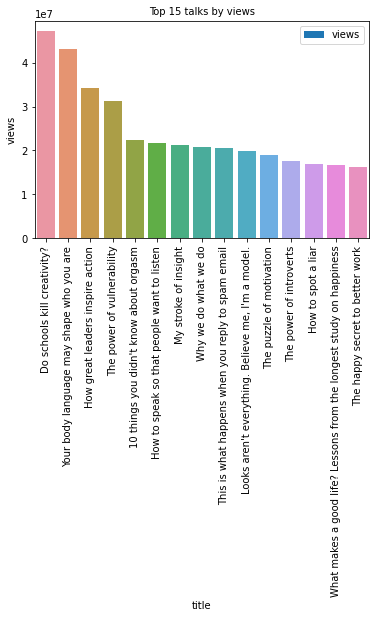

In [8]:
top15.set_index('title').plot(kind='bar')
plt.title('Top 15 talks by views',fontsize=10)
sns.barplot(x='title', y='views', data=top15)

In [9]:
ted['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

In [14]:
ted['viewsmn']=ted['views'].map(lambda x: x/1000000)

In [10]:
ted['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

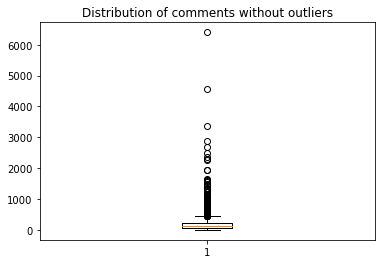

In [11]:
plt.boxplot(ted['comments'],showfliers=True)
plt.title('Distribution of comments without outliers')
plt.show()

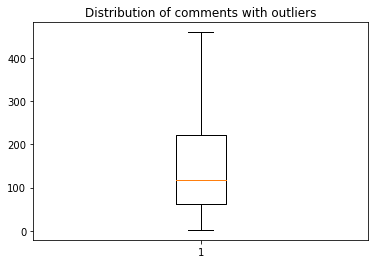

In [12]:
plt.boxplot(ted['comments'],showfliers=False)
plt.title('Distribution of comments with outliers')
plt.show()

In [13]:
ted[['views','comments']].corr().round(4)

,views,comments
views,1.0000,0.5309
comments,0.5309,1.0000


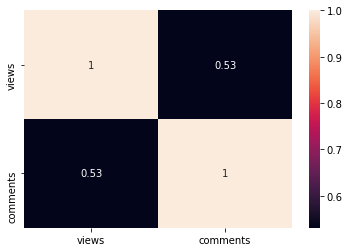

In [14]:
sns.heatmap(ted[['views','comments']].corr().round(4),annot = True)
plt.show()

Text(0, 0.5, 'comments')

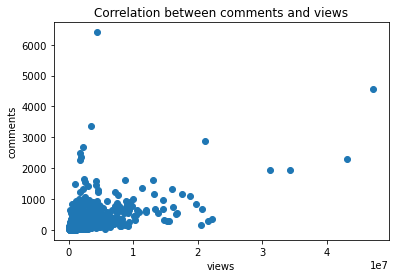

In [15]:
plt.scatter(x='views', y='comments', data=ted)
plt.title('Correlation between comments and views')

plt.xlabel('views')

plt.ylabel('comments')

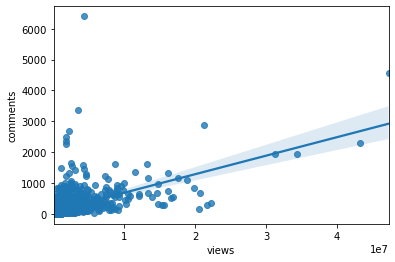

In [16]:
sns.regplot(x = ted['views'], y= ted['comments'])

In [17]:
ted_no_outlier = ted[(ted['views']<3300000)  & (ted['comments']<500)]
ted_no_outlier.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,1152490260,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741
10,79,"Accepting his 2006 TED Prize, Cameron Sinclair...",1414,TED2006,1140912000,27,Cameron Sinclair,Cameron Sinclair: My wish: A call for open-sou...,1,1153786260,"[{'id': 3, 'name': 'Courageous', 'count': 169}...","[{'id': 1749, 'hero': 'https://pe.tedcdn.com/i...","Co-founder, Architecture for Humanity","['activism', 'architecture', 'collaboration', ...",My wish: A call for open-source architecture,https://www.ted.com/talks/cameron_sinclair_on_...,1211416


In [18]:
ted_no_outlier[['views','comments']].corr().round(4)

,views,comments
views,1.0000,0.3706
comments,0.3706,1.0000


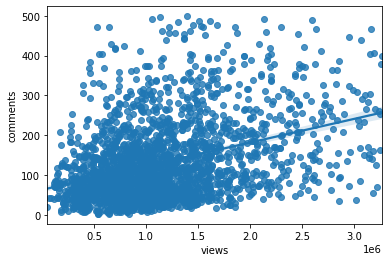

In [19]:
sns.regplot(x = ted_no_outlier['views'], y= ted_no_outlier['comments'])

In [20]:
# top 10 commented ted talk of all time
top_10_comment = ted[['views','comments']].sort_values(['comments','views'],ascending=[False,False])[:10]
top_10_comment.head()

,views,comments
96,4374792,6404
0,47227110,4553
644,3433437,3356
201,21190883,2877
1787,2162764,2673


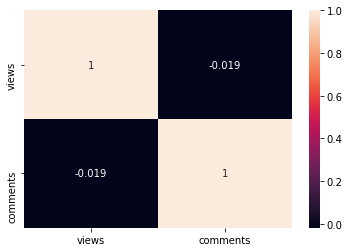

In [21]:
sns.heatmap(top_10_comment[['views','comments']].corr().round(4),annot = True)
plt.show()

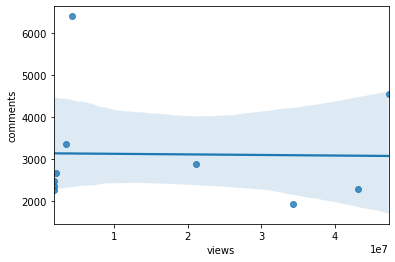

In [22]:
sns.regplot(x = top_10_comment['views'], y= top_10_comment['comments'])

In [23]:
#create a discussion quotient
ted['dis_quo'] = ted['comments']/ted['views']

In [24]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'dis_quo'],
      dtype='object')

In [25]:
ted[['title','main_speaker','tags','views','comments','dis_quo']].sort_values('dis_quo',ascending = False).head(10)

,title,main_speaker,tags,views,comments,dis_quo
744,The case for same-sex marriage,Diane J. Savino,"['God', 'LGBT', 'culture', 'government', 'law'...",292395,649,0.002220
803,E-voting without fraud,David Bismark,"['culture', 'democracy', 'design', 'global iss...",543551,834,0.001534
96,Militant atheism,Richard Dawkins,"['God', 'atheism', 'culture', 'religion', 'sci...",4374792,6404,0.001464
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,"['TED Fellows', 'children', 'culture', 'film',...",1057238,1502,0.001421
954,Taking imagination seriously,Janet Echelman,"['art', 'cities', 'culture', 'data', 'design',...",1832930,2492,0.001360
840,On reading the Koran,Lesley Hazleton,"['TEDx', 'culture', 'global issues', 'journali...",1847256,2374,0.001285
876,Curating humanity's heritage,Elizabeth Lindsey,"['anthropology', 'storytelling']",439180,555,0.001264
1787,How do you explain consciousness?,David Chalmers,"['brain', 'consciousness', 'neuroscience', 'ph...",2162764,2673,0.001236
661,The danger of science denial,Michael Specter,"['global issues', 'medicine', 'religion', 'sci...",1838628,2272,0.001236
561,Dance to change the world,Mallika Sarabhai,"['culture', 'dance', 'entertainment', 'global ...",481834,595,0.001235


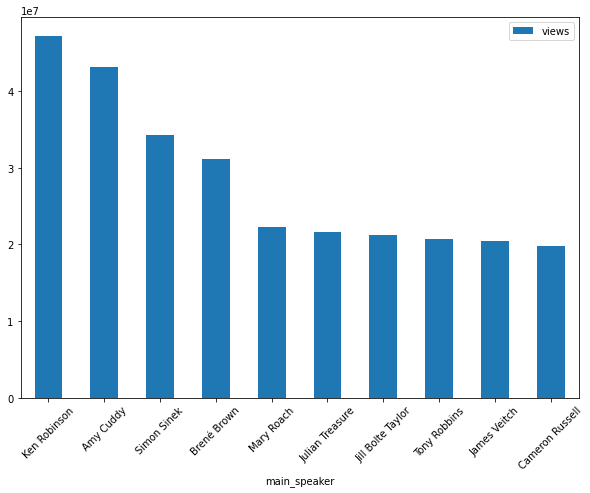

In [26]:
#top speakers
ted[['main_speaker','views']].set_index('main_speaker').sort_values('views',ascending =False)[:10].plot(kind= 'bar',rot =45,figsize=(10,7))

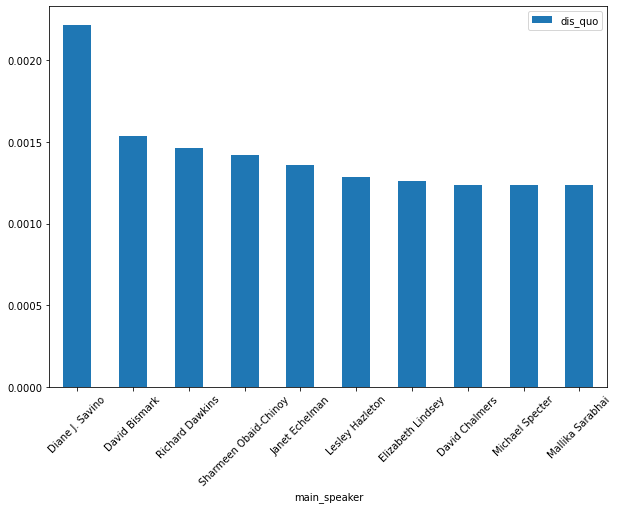

In [27]:
#top speakers
ted[['main_speaker','dis_quo']].set_index('main_speaker').sort_values('dis_quo',ascending =False)[:10].plot(kind= 'bar',rot =45,figsize=(10,7))

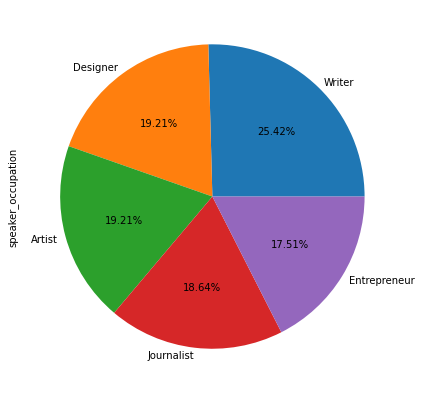

In [28]:
ted['speaker_occupation'].value_counts()[:5].plot(kind= 'pie', autopct = '%1.2f%%',labeldistance = 1.05,figsize = (10,7))

In [44]:
ted_pivot = ted.pivot_table(index ='speaker_occupation',values = 'views', aggfunc = ['count','mean', 'median'])
ted_pivot

,count,mean,median
,views,views,views
speaker_occupation,,,
Chairman of the Cordoba Initiative,1,433202.0,433202.0
"Child protection leader, activist, author",1,656113.0,656113.0
Robotics engineer,1,375647.0,375647.0
Space physicist,1,1465749.0,1465749.0
3D printer,1,2526255.0,2526255.0
...,...,...,...
e-Patient,1,534289.0,534289.0
"inventor, engineer",1,1415724.0,1415724.0


In [47]:
[col[0] + f"_r{col[1]}" for col in ted_pivot.columns]
ted_pivot

,count,mean,median
,views,views,views
speaker_occupation,,,
Chairman of the Cordoba Initiative,1,433202.0,433202.0
"Child protection leader, activist, author",1,656113.0,656113.0
Robotics engineer,1,375647.0,375647.0
Space physicist,1,1465749.0,1465749.0
3D printer,1,2526255.0,2526255.0
...,...,...,...
e-Patient,1,534289.0,534289.0
"inventor, engineer",1,1415724.0,1415724.0


In [42]:
[c for c in ted_pivot.columns]
ted_pivot

,c__,m__,m__
speaker_occupation,,,
Chairman of the Cordoba Initiative,1,433202.0,433202.0
"Child protection leader, activist, author",1,656113.0,656113.0
Robotics engineer,1,375647.0,375647.0
Space physicist,1,1465749.0,1465749.0
3D printer,1,2526255.0,2526255.0
...,...,...,...
e-Patient,1,534289.0,534289.0
"inventor, engineer",1,1415724.0,1415724.0
medical inventor,1,1682547.0,1682547.0


In [48]:
ted_pivot.columns = [str(c[0]) + '_' + str(c[1]) for c in ted_pivot.columns]
ted_pivot

,count_views,mean_views,median_views
speaker_occupation,,,
Chairman of the Cordoba Initiative,1,433202.0,433202.0
"Child protection leader, activist, author",1,656113.0,656113.0
Robotics engineer,1,375647.0,375647.0
Space physicist,1,1465749.0,1465749.0
3D printer,1,2526255.0,2526255.0
...,...,...,...
e-Patient,1,534289.0,534289.0
"inventor, engineer",1,1415724.0,1415724.0
medical inventor,1,1682547.0,1682547.0


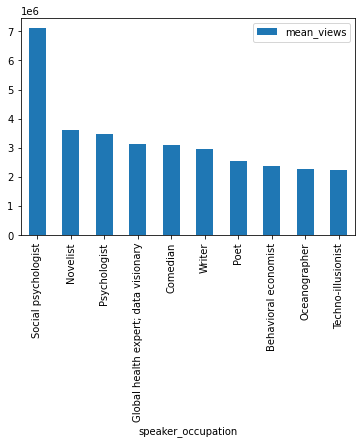

In [49]:
ted_pivot[ted_pivot['count_views'] > 5].sort_values('mean_views', ascending=False)[:10][['mean_views']].plot(kind='bar')

In [50]:
ted['duration_mins']= ted['duration'].map(lambda x:x/60)

In [51]:
shortest = min(ted['duration_mins'])
longest = max(ted['duration_mins'])
average = np.mean(ted['duration_mins'])
median = np.median(ted['duration_mins'])

In [52]:
print(f'Longest talk - {longest}\nShortest talk - {shortest}\nAverage talk - {average}\nMedian talk - {median}')

Longest talk - 87.6
Shortest talk - 2.25
Average talk - 13.775169934640537
Median talk - 14.133333333333333


In [53]:
ted['duration_mins'].describe().round(2)

count    2550.00
mean       13.78
std         6.23
min         2.25
25%         9.62
50%        14.13
75%        17.45
max        87.60
Name: duration_mins, dtype: float64

In [54]:
#Wordcloud
ted['tags'] = ted['tags'].map(lambda x: x.replace('[', '').replace(']', '').split(','))

In [55]:
tags_ls=[]
for tag in ted['tags'].values:
    tags_ls.extend(tag)
    
final_string =' '.join(list(set(tags_ls))).replace('\'','').strip()

In [ ]:
# plot the WordCloud image 
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(final_string)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
# plot the WordCloud image 
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(final_string)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()